In [2]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from copy import deepcopy
import random
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from dython import nominal
#from orion.contrib.envs import load_env
#load_env()
import boto3
#from orion.sources import S3Source
aws_bucket = 'kilimanjaro-prod-datalake'
s3 = boto3.client('s3')

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [46]:
cust_summary = pd.read_csv('cust_summary.csv', index_col=0)
cust_summary.head()

,customerkey,orders,total_unitssold,total_grosssales,ASP,loyaltyaccount,gender,shipcountry,postcode,category,divisioncode,productgroup,brandcode
0,fb484d6a54da0d56910e2df0064c18c722801a66,256,603,35645.08,61.44,Yes,female,United Kingdom,TW9,Junior,FOOTWEAR,Basketball,AA
1,649cca818138ed8152825855e0538ed7360bd55a,152,400,18320.26,51.97,Yes,female,United Kingdom,DL5,Mens,APPAREL,Nylon Running,NN
2,559aec727d6d73e55e476a34a374f1fb26dc06cf,152,401,16730.55,44.44,Yes,female,United Kingdom,LL18,Mens,FOOTWEAR,Vulcanised,NN
3,35d17f77612459a698d0179b7525c6eedacc6fd6,144,469,15046.12,37.51,Yes,female,United Kingdom,N19,Mens,APPAREL,T-shirts,KWD
4,67f9aeeef82eefa706b6886df0b790992e3b5a61,114,225,11631.89,63.97,Yes,male,United Kingdom,WA1,Womens,FOOTWEAR,Nylon Running,AA


In [34]:
cust_summary.describe()

,orders,total_unitssold,total_grosssales,ASP
count,2.204873e+06,2.204873e+06,2.204873e+06,2.204873e+06
mean,1.506948e+00,4.984994e+00,1.930395e+02,4.614653e+01
std,1.310425e+00,6.342477e+00,2.389565e+02,2.735562e+01
min,1.000000e+00,-1.000000e+00,2.200000e-01,2.200000e-01
25%,1.000000e+00,2.000000e+00,7.541000e+01,2.591000e+01
50%,1.000000e+00,4.000000e+00,1.269900e+02,3.742000e+01
75%,2.000000e+00,6.000000e+00,2.183700e+02,6.144000e+01
max,2.560000e+02,6.030000e+02,3.564508e+04,2.866800e+02


In [38]:
cust_summary['customerkey'].nunique()

1570551

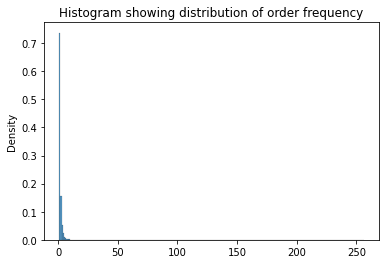

In [35]:
frequency = cust_summary.orders.values
ax = sns.histplot(frequency, stat="density", binwidth=1)
plt.title('Histogram showing distribution of order frequency')
plt.show()

In [40]:
single_purchase = len(cust_summary[(cust_summary['orders'] == 1)])
multi_purchase = len(cust_summary[(cust_summary['orders'] != 1)])
print(single_purchase)
print(multi_purchase)
print(multi_purchase/ single_purchase)

1625249
579624
0.3566370445390214


In [41]:
print(cust_summary['brandcode'].nunique())
cust_summary['brandcode'].value_counts()

327


NN      576284
NONR    557944
AA      293986
VV       99121
KWD      63712
         ...  
DIE          1
CNS          1
KDS          1
POH          1
VI           1
Name: brandcode, Length: 327, dtype: int64

In [42]:
print(cust_summary['category'].nunique())
cust_summary['category'].value_counts()

8


Mens             1309185
Junior            310652
Womens            300356
Miscellaneous     146219
Boys               75382
Infant             30621
Nursery            28427
Childrens           4031
Name: category, dtype: int64

In [43]:
print(cust_summary['divisioncode'].nunique())
cust_summary['divisioncode'].value_counts()

3


FOOTWEAR     1284179
APPAREL       734387
ACCESSORY     186307
Name: divisioncode, dtype: int64

In [44]:
print(cust_summary['productgroup'].nunique())
cust_summary['productgroup'].value_counts()

79


Non-retail Items    590409
Nylon Running       444620
T-shirts            189870
Basketball          183274
Vulcanised          154640
                     ...  
Watches                 40
Fashion Tops            29
Miscellaneous           22
Waistcoats              18
Scarves                 11
Name: productgroup, Length: 79, dtype: int64

In [13]:
cust_summary = pd.read_csv('cust_summary.csv', index_col=0)
cust_summary.head(1)

,customerkey,orders,total_unitssold,total_grosssales,ASP,loyaltyaccount,gender,category,divisioncode,productgroup,brandcode
0,fb484d6a54da0d56910e2df0064c18c722801a66,256,603,35645.08,61.44,Yes,female,Junior,FOOTWEAR,Basketball,AA


Text(0.5, 1.0, 'Total Units Sold')

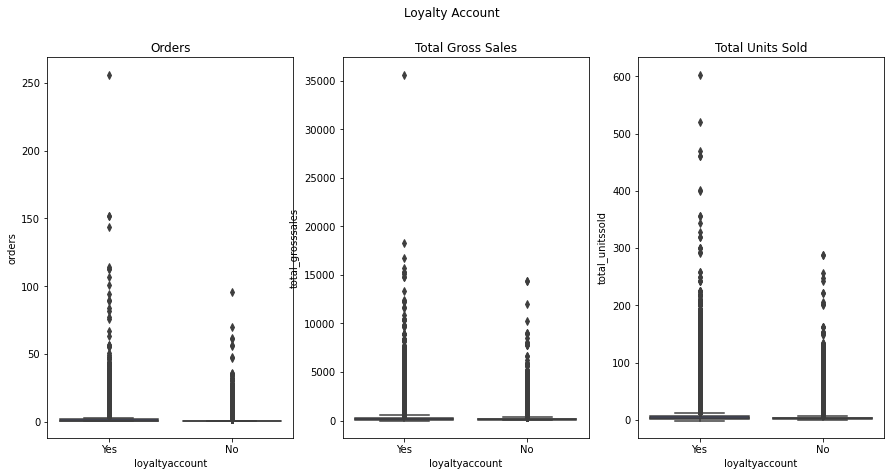

In [21]:
loyal = cust_summary[["orders", "loyaltyaccount", "total_grosssales", 'total_unitssold']]
fig, axes = plt.subplots(1, 3, figsize=(15, 7))
fig.suptitle('Loyalty Account')

sns.boxplot(ax=axes[0], x="loyaltyaccount", y="orders", data=loyal, palette="mako")
axes[0].set_title('Orders')

sns.boxplot(ax=axes[1], x="loyaltyaccount", y="total_grosssales", data=loyal, palette="mako")
axes[1].set_title('Total Gross Sales')

sns.boxplot(ax=axes[2], x="loyaltyaccount", y="total_unitssold", data=loyal, palette="mako")
axes[2].set_title('Total Units Sold')

Text(0.5, 1.0, 'Total Units Sold')

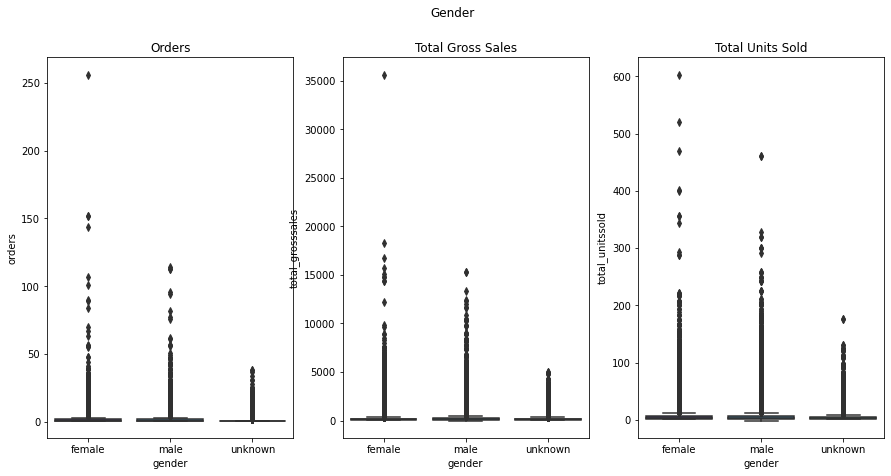

In [22]:
gender = cust_summary[["orders", "gender", "total_grosssales", 'total_unitssold']]
fig, axes = plt.subplots(1, 3, figsize=(15, 7))
fig.suptitle('Gender')

sns.boxplot(ax=axes[0], x="gender", y="orders", data=gender, palette="mako")
axes[0].set_title('Orders')

sns.boxplot(ax=axes[1], x="gender", y="total_grosssales", data=gender, palette="mako")
axes[1].set_title('Total Gross Sales')

sns.boxplot(ax=axes[2], x="gender", y="total_unitssold", data=gender, palette="mako")
axes[2].set_title('Total Units Sold')

Text(0.5, 1.0, 'Most Purchased Category')

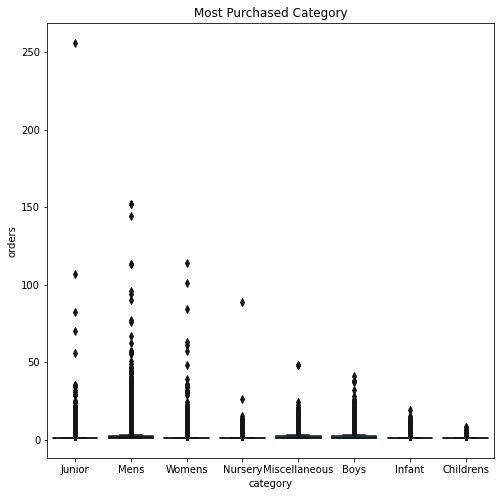

In [27]:
plt.figure(figsize=(8,8))
category = cust_summary[["category", "orders"]]
sns.boxplot(x="category", y="orders", data=category, palette="mako")
plt.title('Most Purchased Category')

Text(0.5, 1.0, 'Most Purchased Division Code')

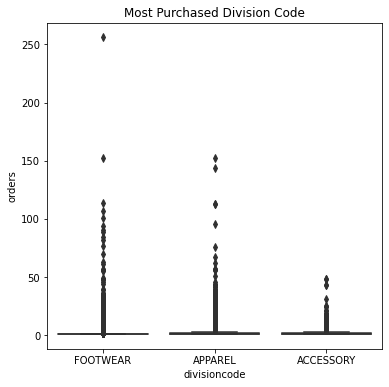

In [29]:
plt.figure(figsize=(6,6))
div = cust_summary[["divisioncode", "orders"]]
sns.boxplot(x="divisioncode", y="orders", data=div, palette="mako")
plt.title('Most Purchased Division Code')

Text(0, 0.5, 'Orders')

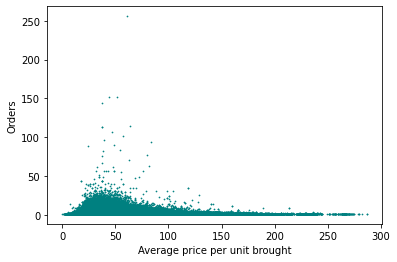

In [30]:
plt.plot('ASP','orders', data=cust_summary, linestyle='', marker='o', markersize=0.7, color='teal')
plt.xlabel('Average price per unit brought')
plt.ylabel('Orders')

In [50]:
ship = cust_summary.groupby(
   ['shipcountry']
).agg(
    {
         'customerkey':lambda x: x.nunique(),  
         'orders': "mean",
         'total_grosssales': "mean",
         'total_unitssold':"mean"
    }
).round(decimals=2)
ship = ship.reset_index()
ship.sort_values("orders", ascending=False, inplace = True)
ship

,shipcountry,customerkey,orders,total_grosssales,total_unitssold
31,Japan,390,3.01,477.93,10.99
51,San Marino,1,3.00,148.64,6.00
22,Greenland,2,3.00,362.64,8.00
66,Vatican,6,2.83,314.05,9.83
65,Unknown,262,2.29,310.89,8.11
...,...,...,...,...,...
42,Monaco,4,1.00,134.86,3.33
18,Georgia,7,1.00,125.91,3.33
61,Turkmenistan,2,1.00,122.28,2.00
36,Liechtenstein,1,1.00,140.41,5.00


In [51]:
post = cust_summary.groupby(
   ['postcode']
).agg(
    {
         'customerkey':lambda x: x.nunique(),  
         'orders': "mean",
         'total_grosssales': "mean",
         'total_unitssold':"mean"
    }
).round(decimals=2)
post = post.reset_index()
post.sort_values("orders", ascending=False, inplace = True)
post

,postcode,customerkey,orders,total_grosssales,total_unitssold
2182,270-,1,96.0,10280.19,256.00
3463,441-,1,36.0,2431.28,72.00
3567,455-,1,35.0,4908.96,119.00
10233,G726,1,35.0,4419.63,89.00
14757,S21N,1,31.0,2711.47,59.00
...,...,...,...,...,...
5202,7061,2,1.0,116.50,4.67
5204,7064,1,1.0,63.39,2.00
5205,7065,1,1.0,171.38,4.00
5206,7070,4,1.0,192.56,4.50
